# 이미지 자료에 대한 이해

`-` 흑백이미지

* 차원 : 세로픽셀수 x 가로픽셀수
    
* 값 : 0 ~ 255 (값이 클수록 흰색)


`-` 칼라이미지

* 차원 : 세로픽셀수 x 가로픽셀수 x 3
    
* 값 : 0 ~ 255 (값이 클수록 진한 빨강, 진판 파랑, 진한 녹색) $\to$ 빛의 3원색을 이용하여 모든 색깔을 표현할 수 있다.   

In [6]:
#!pip install opencv-python

## import

In [25]:
#!pip install wget

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wget

## 이미지 자료 다운로드

In [34]:
url1 =  "https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg"
wget.download(url1)

100% [............................................................................] 110895 / 110895

'Unequalized_Hawkes_Bay_NZ.jpg'

In [54]:
img = cv.imread("Unequalized_Hawkes_Bay_NZ.jpg",0)

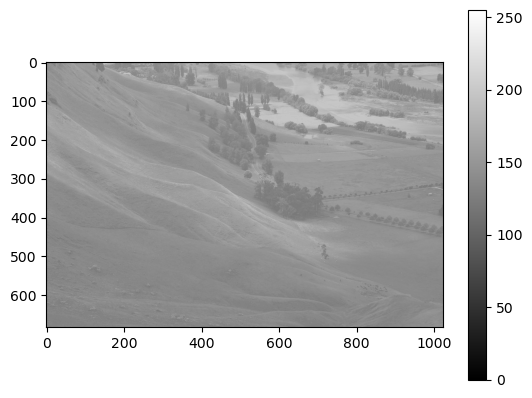

In [36]:
plt.imshow(img,cmap="gray",vmin=0,vmax=255)
plt.colorbar()

* 이미지 자료는 사실 `0 ~ 255` 사이에 어떠한 숫자들이 포함된 매트릭스일 뿐이다.

In [38]:
img

array([[127, 145, 149, ..., 168, 167, 166],
       [165, 152, 143, ..., 168, 169, 168],
       [171, 145, 140, ..., 156, 154, 151],
       ...,
       [147, 132, 134, ..., 146, 145, 144],
       [146, 130, 132, ..., 146, 145, 144],
       [145, 128, 129, ..., 146, 145, 144]], dtype=uint8)

* 이미지라고 믿었던 img는 그냥 numpy matrix 였다.

* 위의 매트릭스에 있는 숫자들을 색깔로 표현하여 값이 클수록 하얗게, 값이 작을수록 검게 그린다.

* 극단적으로 0은 검은색, 255는 흰색이다.

`-` 이미지가 넘파이 매트릭스일 뿐이라는 것을 판다스를 활용하여 시각화한다면 더 잘 이해할 수 있다.

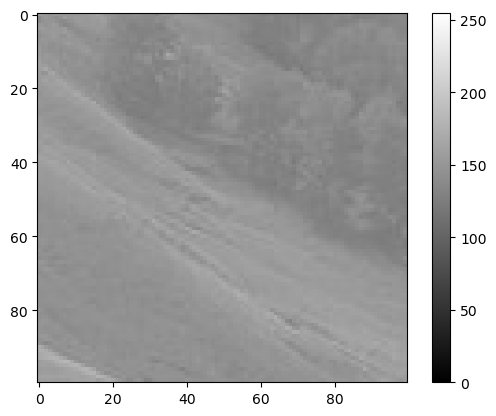

In [43]:
plt.imshow(img[200:300,400:500],cmap="gray", vmin = 0, vmax = 255)
plt.colorbar()

In [44]:
df = pd.DataFrame(img)

In [47]:
df.iloc[200:300, 400:500].style.set_properties(**{"font-size" : "10pt"}).background_gradient("gray",vmin=0, vmax=255)

In [48]:
df

0     1     2     3     4     5     6     7     8     9     ...  1014  \
0     127   145   149   146   150   144   137   144   127   147  ...   167   
1     165   152   143   141   141   144   146   145   140   135  ...   166   
2     171   145   140   140   128   131   142   138   148   139  ...   161   
3     154   140   146   152   138   135   141   135   146   144  ...   151   
4     137   135   140   145   142   139   136   131   145   140  ...   143   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
678   146   134   133   132   130   133   132   134   134   132  ...   143   
679   147   136   135   133   132   133   132   133   136   134  ...   143   
680   147   132   134   131   135   132   131   130   127   123  ...   145   
681   146   130   132   130   136   134   133   131   130   126  ...   145   
682   145   128   129   129   137   136   135   132   132   130  ...   145   

     1015  1016  1017  1018  1019  1020  1021  1022  1023  
0     170   170   171   171   170   169   168   167   166  
1     167   168   166   163   163   166   168   169   168  
2     163   163   157   151   151   154   156   154   151  
3     159   156   149   143   143   144   143   138   134  
4     156   150   145   141   141   142   141   140   139  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
678   143   142   143   144   144   144   144   145   146  
679   143   142   142   142   143   145   147   147   147  
680   146   145   145   145   146   146   146   145   144  
681   146   145   145   145   145   146   146   145   144  
682   146   144   144   145   145   146   146   145   144  

[683 rows x 1024 columns]

* 결국 이 이미지는 `684 x 1024`개의 숫자 모임이다.

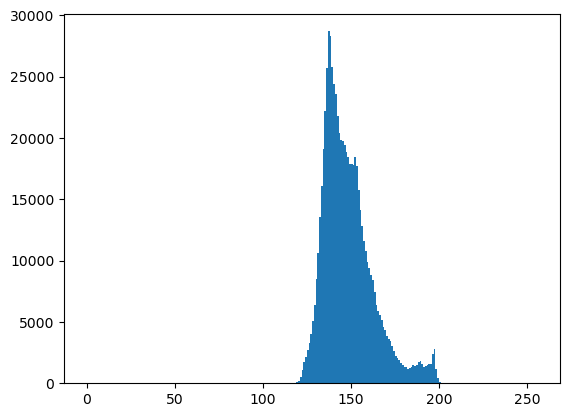

In [49]:
fig = plt.hist(img.flatten(),bins=256,range= [0,256])

1. 히스토그램을 그려보니 120 ~ 200 사이에 값들이 몰려있다.

2. 원래 0 ~ 255까지의 색을 표현할 수 있는데 컴퓨터가 표현가능한 색상보다 적은 조합만을 사용하고 있음.

3. 아이디어 : 좀 더 많은 색상을 표현하려면, 위 히스토그램을 평평하게, 즉 평활화 작업이 필요하다.

In [55]:
img2 = cv.equalizeHist(img)

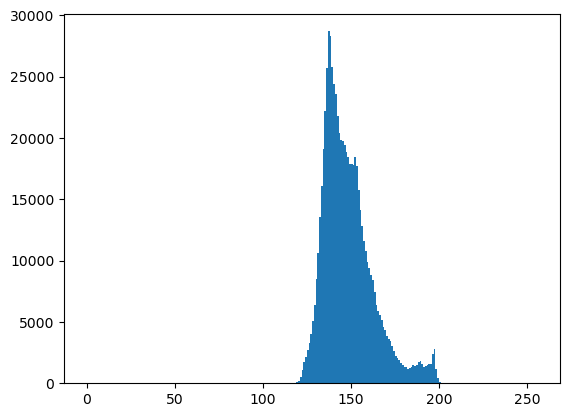

In [56]:
fig2_1 = plt.hist(img.flatten(), bins = 256, range=[0,256])

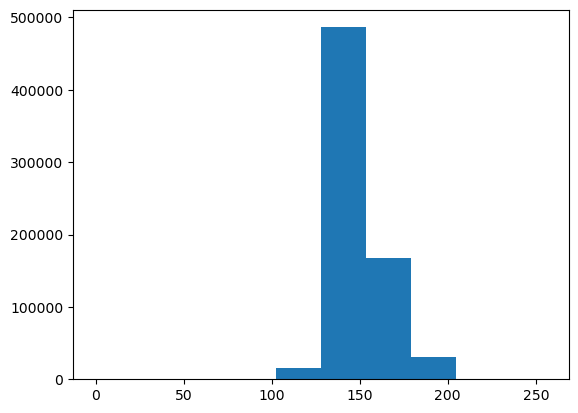

In [57]:
fig2_2 = plt.hist(img.flatten(), bins = 10, range = [0, 256])

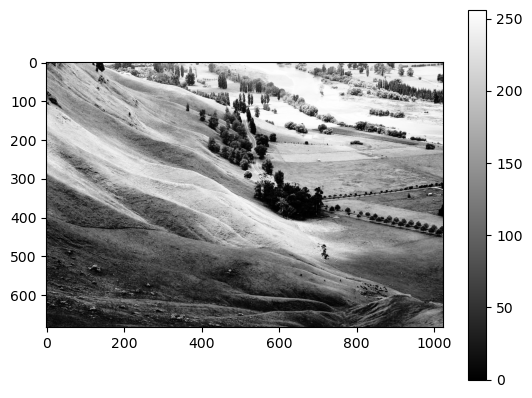

In [59]:
plt.imshow(img2, cmap = "gray",vmin = 0, vmax = 256)
plt.colorbar()

`-` 비교

In [60]:
import numpy as np

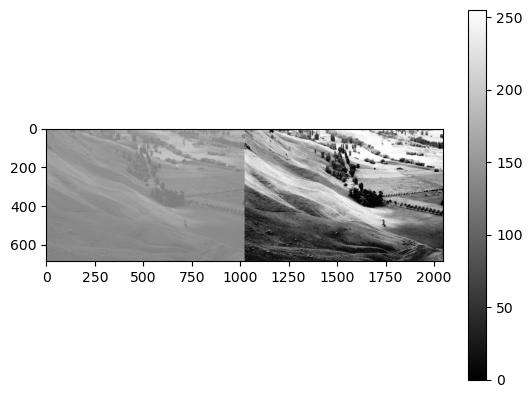

In [63]:
_img = np.hstack((img,img2))

plt.imshow(_img, cmap = "gray")
plt.colorbar()

## 보충

In [65]:
url2 =  "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
wget.download(url2)

100% [............................................................................] 212652 / 212652

'Golde33443.jpg'

`-` 흑백이미지

* 차원 : 세로픽셀수 x 가로픽셀수
    
* 값 : 0 ~ 255 (값이 클수록 흰색)


`-` 칼라이미지

* 차원 : 세로픽셀수 x 가로픽셀수 x 3
    
* 값 : 0 ~ 255 (값이 클수록 진한 빨강, 진한 녹색, 진한 파랑,) $\to$ 빛의 3원색을 이용하여 모든 색깔을 표현할 수 있다.

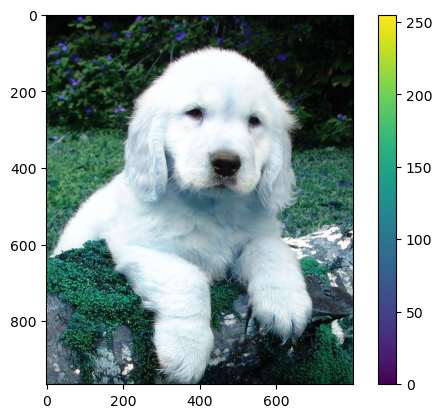

In [70]:
import cv2 as cv

dog = cv.imread("Golde33443.jpg")

plt.imshow(dog,vmin=0,vmax=255)
plt.colorbar()

`-` 차원을 비교해보면, 흑백 사진과 다르게 샘감이 있어 차이가 발생함을 알 수 있다.

In [72]:
img.shape

(683, 1024)

In [71]:
dog.shape

(965, 800, 3)

### 다양한 색깔 표현

`1` 일단 원소값을 모두 0으로 한 array를 만듬

In [93]:
d_red = np.zeros_like(dog)
d_blue = np.zeros_like(dog)
d_green = np.zeros_like(dog)

`2` 빨강, 파랑, 노랑 순으로 데이터를 집어넣음.

In [94]:
d_red[:,:,0] = dog[:,:,0]
d_green[:,:,1] = dog[:,:,1]
d_blue[:,:,2] = dog[:,:,2]

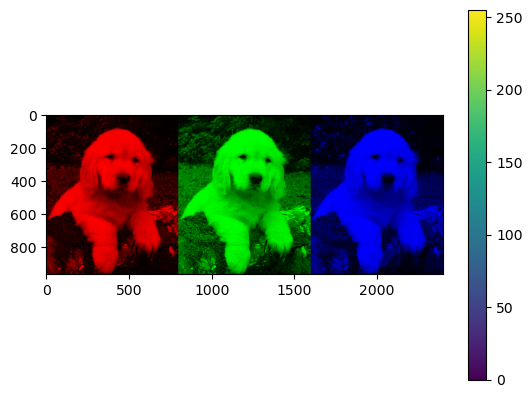

In [96]:
_img = np.hstack((d_red,d_green,d_blue))

plt.imshow(_img)
plt.colorbar()

`-` 빨강 + 녹색

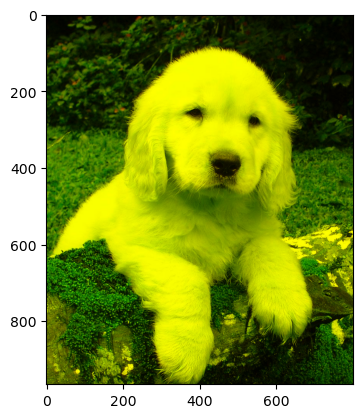

In [97]:
plt.imshow(d_red + d_green)

`-` 모든 색깔을 표현하려면?

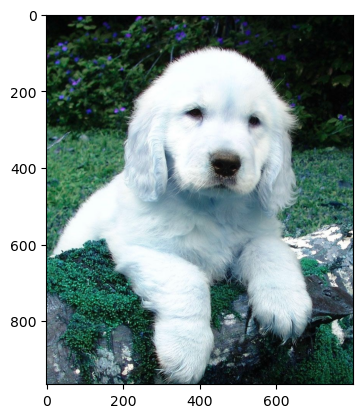

In [98]:
plt.imshow(d_red + d_green+ d_blue)

### Summary

* 이미지 색감에 따른 크기 정도 $\to$ 빨 > 녹 > 파

* 이미지는 단순히 숫자로 이루어진 매트릭스이다.

# 산점도

`-` 두 변수간의 관계를 나타내는 그래프

In [104]:
x = [1,2,3,4]
y = [2,3,5,5]

In [102]:
import matplotlib.pyplot as plt

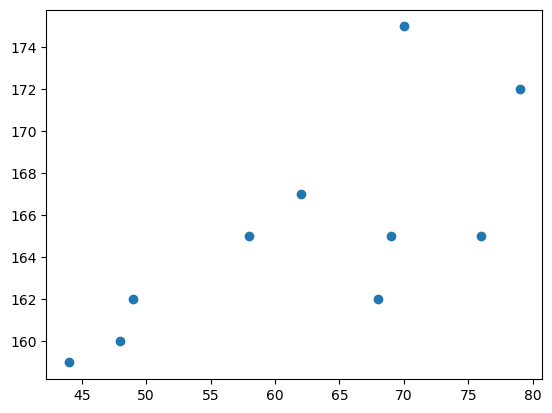

In [107]:
# | code-fold : true
plt.plot(x,y,"o")

## 예제 1

* 키가 큰사람일 수록 몸무게도 많이 나간다.

* 즉, 키와 몸궤는 정비례 관계에 있다.

In [106]:
x = [44,48,49,58,62,68,69,70,76,79]
y = [159,160,162,165,167,162,165,175,165,172]

### 상관계수

`1` 

$$r=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

`2`

$$r=\sum_{i=1}^{n}\Bigg(\frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}}\frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}\Bigg)$$

`3`

$$\tilde{x}_i = \frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}}\quad \tilde{y}_i = \frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$

`4`

$$r=\sum_{i=1}^{n} \tilde{x}_i \tilde{y}_i$$

In [110]:
x = np.array(x)
y = np.array(y)

`-` 각각의 분모자리 계산

In [116]:
a = np.sqrt( np.sum ((x-np.mean(x)) **2 ))
b = np.sqrt( np.sum ((y-np.mean(y)) **2 ))

In [117]:
a,b

(36.58004920718396, 15.218409903797438)

`-` 분모 자리는 x,y의 분산꼴이므로 $a,b$ 를 비교해보았을 때 $\{x_i\}$가 $\{y_i\}$ 보다 평균에서 더 흩어져 있는 것 같다.

In [118]:
xx = (x-np.mean(x))/a
yy = (y-np.mean(y))/b

Text(0.5, 1.0, 'xx,yy')

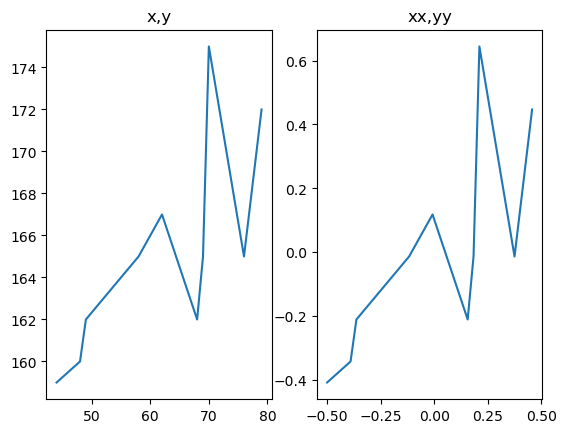

In [123]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(x,y)
ax2.plot(xx,yy)
ax1.set_title("x,y")
ax2.set_title("xx,yy")

`-` 두 그림이 별로 차이가 없어보이지만 범위가 조정된 결과이다.

* 즉, $(x,\tilde x)$ $(y,\tilde y)$는 평균에서부터 떨어진 정도가 거의 비슷하다.

`-` 질문 1 : $r$의 값이 양수인가? 음수인가?

* plotly를 이용한 산점도를 이용해 관측치를 살펴보자.

In [153]:
import plotly.express as ex

In [160]:
fig = ex.scatter(x=xx,y=yy)
fig.show(renderer="notebook")

* $(\tilde x, \tilde y)$ 값을 보니 점들이 0을 기준으로 1사분면과 3사분면에 몰려있다.

* $(\tilde x \times \tilde y)$ 값이 양수인 것과 음수인 것을 체크해보자.

* 양수인쪽이 많은지 음수인쪽이 많은지 보고 $r=\sum_{i=1}^{n}\tilde{x}_i \tilde{y}_i$ 을 직관적으로 생각해볼 수 있다.

## 예제 2

### 산점도를 이용한 상관계수 파악

`-` 질문2 : 아래와 같은 두개 개의 데이터 셋이 있다고 하자.

In [137]:
## set 1
x1 = np.arange(0,10,0.1)
y1 = x1 + np.random.normal(loc=0, scale=1, size=len(x1))

## set2

x2 = np.arange(0,10,0.1)
y2 = x2 + np.random.normal(loc=0, scale=7, size=len(x2))


Text(0.5, 1.0, 'scale= 7')

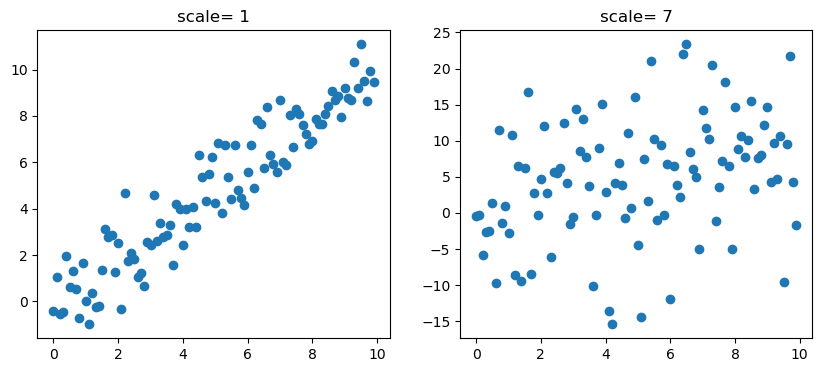

In [140]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.plot(x1,y1,"o")
ax2.plot(x2,y2,"o")
ax1.set_title("scale= 1")
ax2.set_title("scale= 7")

`-` $(\tilde x, \tilde y)$ 구하기

In [142]:
n = len(x1)

xx1 = (x1-np.mean(x1))/ (np.std(x1)*np.sqrt(n))
xx2 = (x2-np.mean(x2))/ (np.std(x2)*np.sqrt(n))
yy1 = (y1-np.mean(y1))/ (np.std(y1)*np.sqrt(n))
yy2 = (y2-np.mean(y2))/ (np.std(y2)*np.sqrt(n))


Text(0.5, 1.0, 'scale= 7')

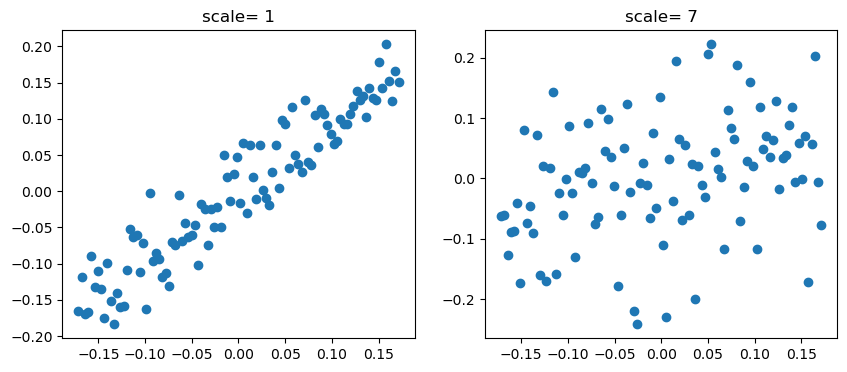

In [144]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.plot(xx1,yy1,"o")
ax2.plot(xx2,yy2,"o")
ax1.set_title("scale= 1")
ax2.set_title("scale= 7")

(1) $r_1, r_2$의 부호는 양수인가? 음수인가? 

(2) $r_1, r_2$의 값 중 어떠한 값이 더 절대값이 큰가?

In [145]:
sum(xx1*yy1), sum(xx2*yy2)

(0.9431351313287185, 0.32011558760698944)

### Ancombe's quartet

In [146]:
x  = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

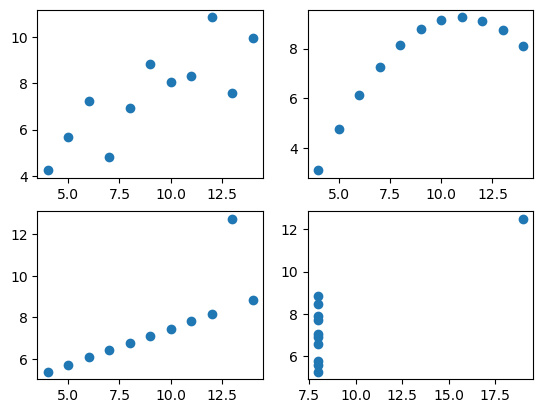

In [151]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(x,y1,"o")
axs[0,1].plot(x,y2,"o")
axs[1,0].plot(x,y3,"o")
axs[1,1].plot(x4,y4,"o")

* 위 4개의 그림은 상관계수가 모두 같은 그림이다 $\to$ 0.81652

* 상관계수는 두 변수의 인과관계를 설명하기에 부적절하다.

* 상관계수는 단지 두 변수가 선형관계에 있을 때 그 정도를 나타내는 통계량일 뿐이다.

* 교훈: 기본적인 통계량들은 실제자료를 분석하기에 부적절할 수 있다. (= 통계량은 적절한 가정이 동반되어야 의미가 있다.)